# 1) (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

    

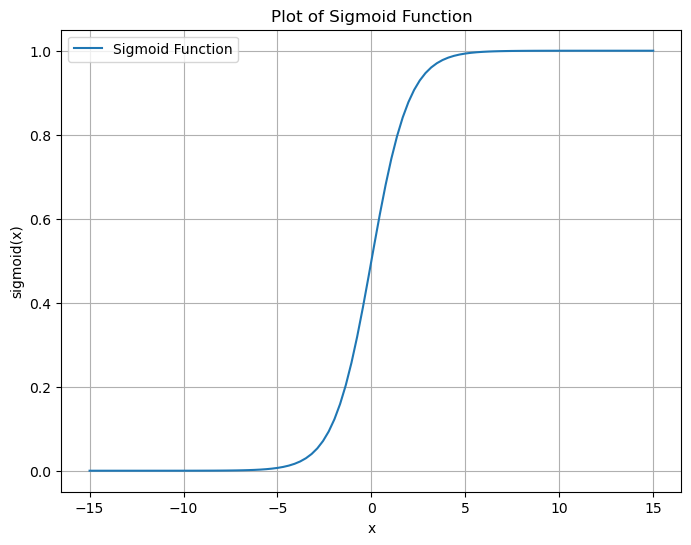

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Taking x values between -15 to 15 to plot the function 
x = np.linspace(-15, 15, 100)
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Plot of Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()


# Interpretation and Usefulness of Sigmoid Function:
The sigmoid function is commonly used in logistic regression and other classification algorithms.
It has an S-shaped curve, mapping any real-valued number to the range [0, 1].
As seen in the plot, the sigmoid function outputs values close to 0 for large negative inputs and values close to 1 for large positive inputs.
This property makes it suitable for binary classification problems, where we want to predict probabilities of belonging to a certain class.
The output of the sigmoid function can be interpreted as the probability of the input belonging to the positive class (class 1), which is crucial for making binary classification decisions.


# (b) Plot the log functions in the cost function individually. Print your interpretation of the log functions

     


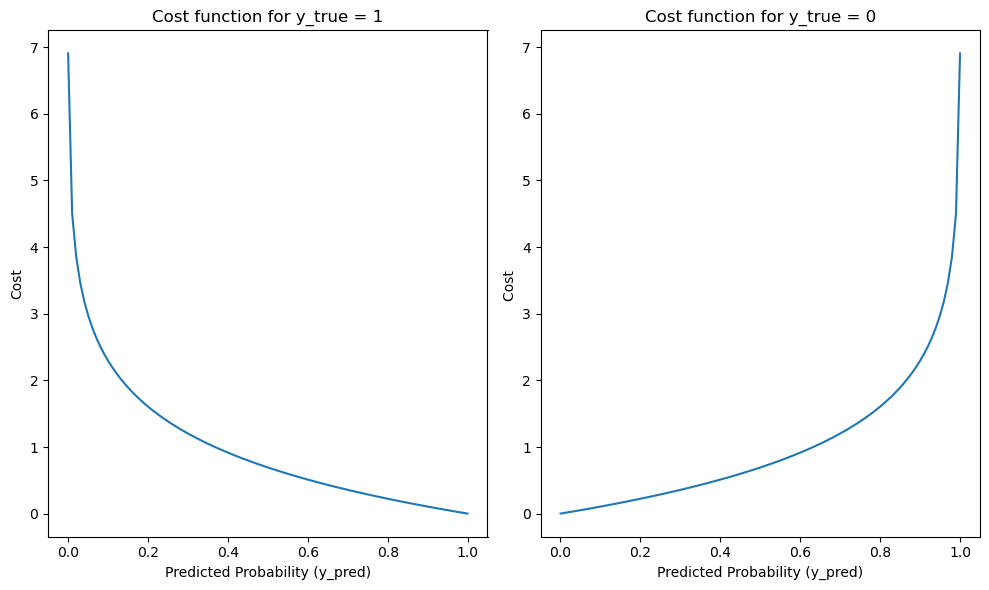

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
def cost_fun(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate predicted probabilities (y_pred) between 0 and 1
y_pred = np.linspace(0.001, 0.999, 100)

# log loss for y_true = 1
log_loss_1 = cost_fun(1, y_pred)

# log loss for y_true = 0
log_loss_0 = cost_fun(0, y_pred)

# Plot the log functions
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(y_pred, log_loss_1)
plt.xlabel('Predicted Probability (y_pred)')
plt.ylabel('Cost')
plt.title('Cost function for y_true = 1')

plt.subplot(1, 2, 2)
plt.plot(y_pred, log_loss_0)
plt.xlabel('Predicted Probability (y_pred)')
plt.ylabel('Cost ')
plt.title('Cost function for y_true = 0')

plt.tight_layout()
plt.show()


# Interpretation of Log Functions:

The log loss function, also known as cross-entropy loss, is commonly used as the cost function in logistic regression.
It penalizes the model more when it predicts with high confidence (close to 0 or 1) and makes an incorrect prediction.
The log loss function for y_true = 1 penalizes predicted probabilities close to 0 more severely, as seen by the steep increase as y_pred approaches 0.
Conversely, the log loss function for y_true = 0 penalizes predicted probabilities close to 1 more severely, as seen by the steep increase as y_pred approaches 1.
Both log loss functions are convex and continuous, making them suitable for optimization using gradient-based methods.
The log loss functions are essential in logistic regression for quantifying the model's performance and guiding the optimization process towards accurate predictions and well-calibrated probabilities.

# c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.


# Using Linear regression on the 'univariate_linear_regression.csv' data set and plotting the mean square error surface plot and its contour.

In [113]:
import numpy as np
import pandas as pd

# def mse_cost_fun(y_true,y_pred):
#     error = np.mean((y_true-y_pred)**2)
#     return error

# def Linear_regression(w,x):
#     m = len(x)
#     y_pred = np.zeros((m,m))
#     for i in range(m):
#         y_pred[i] = np.dot(x,w[i].T)
    
#     return y_pred

# w0 = np.linspace(-10,10,200)
# w1 = np.linspace(-15,15,200)
# w = np.column_stack((w0,w1))
# w.shape
def gradient_decent(x_train,y_train,lr,epoch ):
    m = len(x_train) # No. of samples
    n = len(x_train.T) # No. of features
    print(n)
    wts = np.zeros([epoch,n])  # Matrix to contain weights for each iterations
    w = np.ones((n,1)) # Weight initialization
    wts[0] = w[:,0]
    losses = []  # List to store loss each iteration
    for i in range(epoch):
        y_pred = np.dot(x_train,w)   # predicted value of y
        loss = np.mean((y_pred-y_train)**2)
        losses.append(loss)
        grad = np.zeros(n)
        wts[i] = w[:,0]
        for j in range(n):
            x = x_train[:,j].reshape(-1,1)
            grad[j] = (2/m)*np.dot((y_pred-y_train).T,x)  # calculating gradient w.r.to each weights
            w[j] = w[j] - lr*grad[j]   # Updating weights
    
    
    return w,losses,wts

In [114]:
df2 = pd.read_csv('univariate_linear_regression.csv')
df = df2[['x']]
x_train = df.values  # Convert the data frame to an array
y = df2[['y']]
y_actual = y.values

# Normalize the tarin data
col_2 = (x_train[:,0]-x_train[:,0].mean())/ (x_train[:,0].std())
col_1 = np.ones_like(col_2)

# Column stack of two columns
x_train_normalise = np.stack([col_1, col_2], axis = 0).T


In [115]:
lr = 0.1
epochs = 1000
f_wts, losses, wts_lst = gradient_decent(x_train_normalise,y_actual,lr,epochs)

wts_lst.shape

2


(1000, 2)

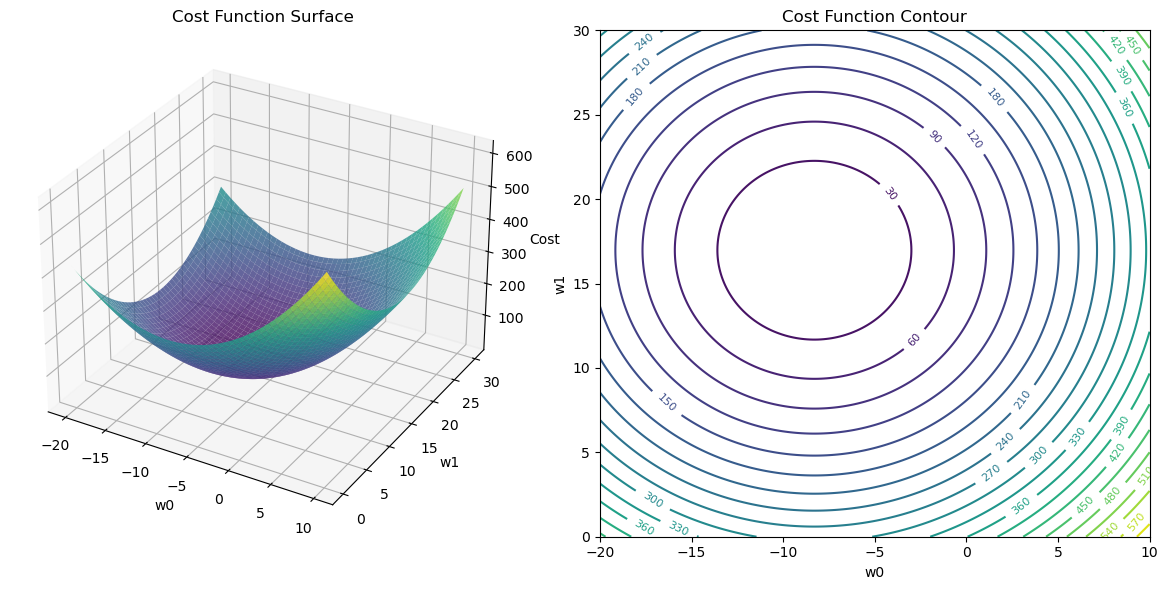

In [116]:
# Plot cost function
fig = plt.figure(figsize=(12, 6))

# Plot surface
ax1 = fig.add_subplot(121, projection='3d')
w0_vals = np.linspace(-20, 10, 200)
w1_vals = np.linspace(0, 30, 200)
w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)
cost_vals = np.zeros_like(w0_vals)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w_tmp = np.array([[w0_vals[i, j]], [w1_vals[i, j]]])
        y_pred_tmp = np.dot(x_train_normalise, w_tmp)
        cost_vals[i, j] = np.mean((y_pred_tmp - y_actual) ** 2)
        
ax1.plot_surface(w0_vals, w1_vals, cost_vals, cmap='viridis', alpha=0.8)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Cost')
ax1.set_title('Cost Function Surface')

# Plot contour
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(w0_vals, w1_vals, cost_vals, levels=20)
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Cost Function Contour')
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.tight_layout()
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

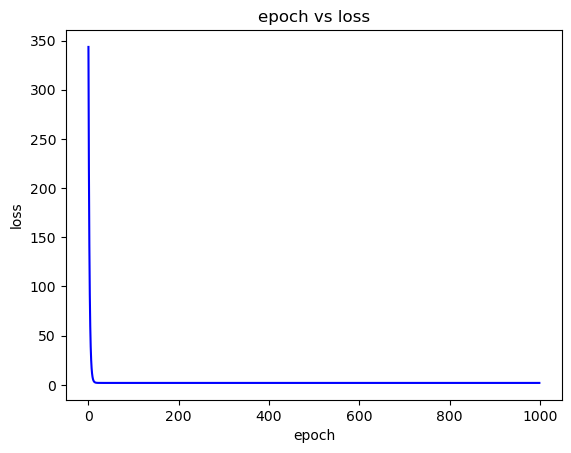

In [117]:
plt.plot(list(range(epochs)),losses,color = 'blue')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss')
plt.show

# Using Logistic regression on the 'univariate_linear_regression.csv' data set and plotting the mean square error surface plot and its contour.

In [143]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fullGradient(w, X, y):
    N,m = X.shape
    grad = np.zeros(m)
    for i in range(N):
        grad += X[i] * (sigmoid(np.dot(X[i], w)) - y[i])
    return grad/N

# Cross entropy loss function
def cost_fun(y_true, y_pred):
    epsilon=1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return np.mean(- y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def logist_regression_gradient_decent(x_train,y_true,lr,epoch ):
    m = len(x_train) # No. of samples
    n = len(x_train.T) # No. of features
    w = np.zeros((n,1)) # Weight initialization
    losses = []  # List to store loss each iteration
    for i in range(epoch):
        y_pred =  sigmoid(np.dot(x_train,w))   # predicted value of y
        loss = cost_fun(y_true, y_pred)
        losses.append(loss)
        grad = np.zeros(n)
        grad = fullGradient(w, x_train, y_true)
        w = w - lr*grad   # Updating weights
    
                

    return w,losses,wts

In [144]:
df1 = pd.read_csv('smarket.csv')
data = df1[['Today','Direction']]   
data['Direction'] = data['Direction'].map({'Up': 1, 'Down': 0}) 
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_8292\573461184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Direction'] = data['Direction'].map({'Up': 1, 'Down': 0})


,Today,Direction
0,0.959,1
1,1.032,1
2,-0.623,0
3,0.614,1
4,0.213,1
...,...,...
1245,0.043,1
1246,-0.955,0
1247,0.130,1
1248,-0.298,0


In [145]:
# df2 = pd.read_csv('univariate_linear_regression.csv')
df = data[['Today']]
x_train = df.values  # Convert the data frame to an array
y = data[['Direction']]
y_actual = y.values

# Normalize the tarin data
col_2 = (x_train[:,0]-x_train[:,0].mean())/ (x_train[:,0].std())
col_1 = np.ones_like(col_2)

# Column stack of two columns
x_train_normalise = np.stack([col_1, col_2], axis = 0).T

In [146]:
# y_actual

In [159]:
lr = 0.01
epochs = 400
final_wts, cross_entropy_losses, wts = logist_regression_gradient_decent(x_train_normalise,y_actual,lr,epochs )
final_wts[0]

array([0.0465673 , 1.02313272])

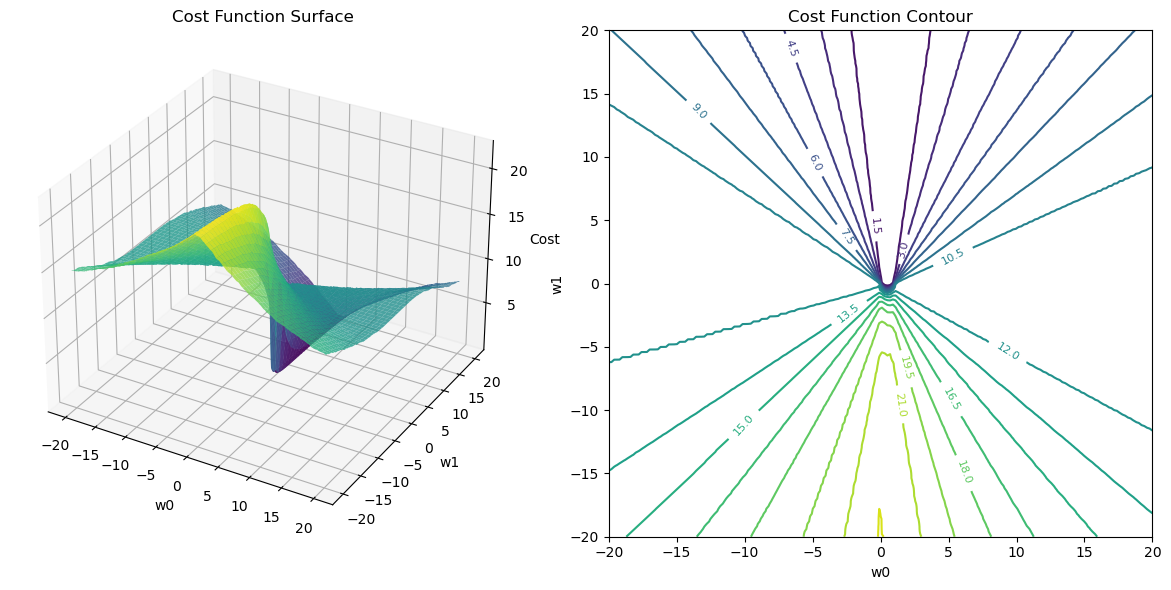

<function matplotlib.pyplot.show(close=None, block=None)>

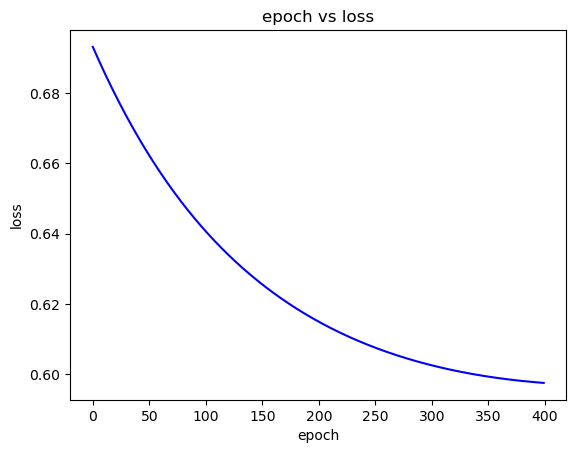

In [160]:
# Plot cost function
fig = plt.figure(figsize=(12, 6))

# Plot surface
ax1 = fig.add_subplot(121, projection='3d')
w0_vals = np.linspace(-20, 20, 200)
w1_vals = np.linspace(-20, 20, 200)
w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)
cost_vals = np.zeros_like(w0_vals)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w_tmp = np.array([[w0_vals[i, j]], [w1_vals[i, j]]])
        y_pred_tmp = np.dot(x_train_normalise, w_tmp)
        cost_vals[i, j] = cost_fun(y_actual, y_pred_tmp)# np.mean((y_pred_tmp - y_actual) ** 2)
        
ax1.plot_surface(w0_vals, w1_vals, cost_vals, cmap='viridis', alpha=0.8)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Cost')
ax1.set_title('Cost Function Surface')

# Plot contour
ax2 = fig.add_subplot(122)
contour_plot = ax2.contour(w0_vals, w1_vals, cost_vals, levels=20)
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Cost Function Contour')
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.tight_layout()
plt.show()


plt.plot(list(range(epochs)),cross_entropy_losses,color = 'blue')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss')
plt.show